# Numerical Solutions to First Order Systems of Differential Equations

The methods used in this report are Euler's method, Runge-Kutta 2 (RK2), Runge-Kutta 4 (RK4), Simplectic Euler method (SE), and Stormer-Verlet method (SV).

## Numerical Solution Functions

In [2]:
import numpy as np

def dynamics_solve(f, D = 1, t_0 = 0.0, s_0 = 1, h = 0.1, N = 100, method = "Euler"):
    """ Solves for dynamics of a given dynamical system
    
    - User must specify dimension D of phase space.
    - Includes Euler, RK2, RK4, that user can choose from using the keyword "method"
    
    Args:
        f: A python function f(t, s) that assigns a float to each time and state representing
        the time derivative of the state at that time.
        
    Kwargs:
        D: Phase space dimension (int) set to 1 as default
        t_0: Initial time (float) set to 0.0 as default
        s_0: Initial state (float for D=1, ndarray for D>1) set to 1.0 as default
        h: Step size (float) set to 0.1 as default
        N: Number of steps (int) set to 100 as default
        method: Numerical method (string), can be "Euler", "RK2", "RK4"
    
    Returns:
        T: Numpy array of times
        S: Numpy array of states at the times given in T
    """
    
    T = np.array([t_0 + n * h for n in range(N + 1)])
    
    if D == 1:
        S = np.zeros(N + 1)
    
    if D > 1:
        S = np.zeros((N + 1, D))
        
    S[0] = s_0
    
    if method == 'Euler':
        for n in range(N):
            S[n + 1] = S[n] + h * f(T[n], S[n])
    
    if method == 'RK2':
        for n in range(N):
            k1 = h * f(T[n], S[n])
            k2 = h * f(T[n] + (0.5 * h), S[n] + (0.5 * k1))
            S[n + 1] = S[n] + k2
    
    if method == 'RK4':
        for n in range(N):
            k1 = h * f(T[n], S[n])
            k2 = h * f(T[n] + (0.5 * h), S[n] + (0.5 * k1)) 
            k3 = h * f(T[n] + (0.5 * h), S[n] + (0.5 * k2)) 
            k4 = h * f(T[n] + h, S[n] + k3) 
            S[n + 1] = S[n] + ((1/6) * (k1 + (2 * k2) + (2 * k3) + k4))
            
    return T, S


def hamiltonian_solve(d_qH, d_pH, d = 1, t_0 = 0.0, q_0 = 0.0, p_0 = 1.0, h = 0.1, N = 100, method = "Euler"):
    """ Solves for dynamics of Hamiltonian system
    
    - User must specify dimension d of configuration space.
    - Includes Euler, RK2, RK4, Symplectic Euler (SE) and Stormer Verlet (SV) 
      that user can choose from using the keyword "method"
    
    Args:
        d_qH: Partial derivative of the Hamiltonian with respect to coordinates (float for d=1, ndarray for d>1)
        d_pH: Partial derivative of the Hamiltonian with respect to momenta (float for d=1, ndarray for d>1)
        
    Kwargs:
        d: Spatial dimension (int) set to 1 as default
        t_0: Initial time (float) set to 0.0 as default
        q_0: Initial position (float for d=1, ndarray for d>1) set to 0.0 as default
        p_0: Initial momentum (float for d=1, ndarray for d>1) set to 1.0 as default
        h: Step size (float) set to 0.1 as default
        N: Number of steps (int) set to 100 as default
        method: Numerical method (string), can be "Euler", "RK2", "RK4", "SE", "SV"
    
    Returns:
        T: Numpy array of times
        Q: Numpy array of positions at the times given in T
        P: Numpy array of momenta at the times given in T
    """
    

    T = np.array([t_0 + n * h for n in range(N + 1)])

    if d == 1:
        P = np.zeros(N + 1)
        Q = np.zeros(N + 1)
        
        Q[0] = q_0
        P[0] = p_0
    
    if d > 1:
        P = np.zeros((N + 1, d))
        Q = np.zeros((N + 1, d))
        
        Q[0] = q_0
        P[0] = p_0
    
    if method == 'Euler':
        for n in range(N):
            Q[n + 1] = Q[n] + h * d_pH(Q[n], P[n])
            P[n + 1] = P[n] - h * d_qH(Q[n], P[n])
    
    if method == 'RK2':
        for n in range(N):
            k1_Q = h * d_pH(Q[n], P[n])
            k1_P = h * (-d_qH(Q[n], P[n]))
            
            k2_Q = h * d_pH(Q[n] + (0.5 * k1_Q), P[n] + (0.5 * k1_P))
            k2_P = h * (-d_qH(Q[n] + (0.5 * k1_Q), P[n] + (0.5 * k1_P)))
            
            
            Q[n + 1] = Q[n] + k2_Q
            P[n + 1] = P[n] + k2_P
        
    if method == 'RK4':
        for n in range(N): 
            k1_Q = h * d_pH(Q[n], P[n])
            k1_P = h * (-d_qH(Q[n], P[n]))
            
            k2_Q = h * d_pH(Q[n] + (0.5 * k1_Q), P[n] + (0.5 * k1_P))
            k2_P = h * (-d_qH(Q[n] + (0.5 * k1_Q), P[n] + (0.5 * k1_P)))
            
            k3_Q = h * d_pH(Q[n] + (0.5 * k2_Q), P[n] + (0.5 * k2_P))
            k3_P = h * (- d_qH(Q[n] + (0.5 * k2_Q), P[n] + (0.5 * k2_P)))
            
            k4_Q = h * d_pH(Q[n] + k3_Q, P[n] + k3_P)
            k4_P = h * (-d_qH(Q[n] + k3_Q, P[n] + k3_P))
            
            Q[n + 1] = Q[n] + ((1/6) * (k1_Q + (2 * k2_Q) + (2 * k3_Q) + k4_Q))
            P[n + 1] = P[n] + ((1/6) * (k1_P + (2 * k2_P) + (2 * k3_P) + k4_P))
            
        
    if method == 'SE':
        for n in range(N):
            Q[n + 1] = Q[n] + h * d_pH(Q[n], P[n])
            P[n + 1] = P[n] - h * d_qH(Q[n + 1], P[n])        
    
    if method == "SV":
        for n in range(N):
            Phalf = P[n] - ((h/2)*d_qH(Q[n], P[n]))
            Q[n + 1] = Q[n] + h * d_pH(Q[n], Phalf)
            P[n + 1] = Phalf - ((h/2) * d_qH(Q[n + 1], P[n]))        
        
    return T, Q, P


## Solving the Population Model Problem

The differential equation governing this problem is:

\begin{equation} \label{eq:1}
\dot{P}(t) = (B - D)P(t), P(0) = P_0
\end{equation}

where B is the birth rate and D is the death rate.

In [3]:
import matplotlib.pyplot as plt


#Returns the rate of population growth dP(t)/dt
def population(t, p, B = 17/1000, D = 32/1000):
    return (B - D) * p

#Returns the exact solution of the population at time t
def exact(t, s0 = 5271000, B = 17/1000, D = 32/1000):
    return np.exp((B - D) * t) * s0


def meanSquareError(domain, data, func):
    difference2 = ((data - func(domain))/ 5271000)**2
    return difference2.mean()
    


Mean Square Error of step size h = 60: 0.0012215308865106674
Mean Square Error of step size h = 30: 0.00038208588421556746
Mean Square Error of step size h = 10: 0.0001018343689890109
Mean Square Error of step size h = 1: 5.4565246114111225e-06
Mean Square Error of step size h = 1/12: 1.6982811639627897e-09


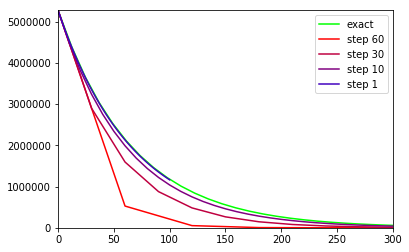

In [4]:
#Euler's method
exactX = np.linspace(0, 600)
plt.plot(exactX, exact(exactX, 5271000), color=[0,1,0])
xvals, yvals = dynamics_solve(population, s_0 = 5271000, h = 60)
xvals2, yvals2 = dynamics_solve(population, s_0 = 5271000, h = 30)
xvals3, yvals3 = dynamics_solve(population, s_0 = 5271000, h = 10)
xvals4, yvals4 = dynamics_solve(population, s_0 = 5271000, h = 1)
xvals5, yvals5 = dynamics_solve(population, s_0 = 5271000, h = 1/12)


print("Mean Square Error of step size h = 60:", meanSquareError(xvals, yvals, exact))
print("Mean Square Error of step size h = 30:", meanSquareError(xvals2, yvals2, exact))
print("Mean Square Error of step size h = 10:", meanSquareError(xvals3, yvals3, exact))
print("Mean Square Error of step size h = 1:", meanSquareError(xvals4, yvals4, exact))
print("Mean Square Error of step size h = 1/12:", meanSquareError(xvals5, yvals5, exact))


plt.plot(xvals, yvals, color = [1.,0.,0.])
plt.plot(xvals2, yvals2, color = [.75,0,.25])
plt.plot(xvals3, yvals3, color = [.5,0.,.5])
plt.plot(xvals4, yvals4, color = [.25,0.,.75])
plt.axis([0, 300, 0, 5271000])
plt.legend(("exact", "step 60", "step 30", "step 10", "step 1"))
plt.show()

For Euler's method, we found that using a step size of h = 1 leads to a graph that fits the exact solution graph extremely closely. Of course, even smaller step sizes create closer values to the exact solution. But, a step size of h = 1 was sufficiently small. We also did a mean square error test to show that as we decrease the step size, the mean square error decreases as well. 

The mean square error is useful because it finds the difference between the numerical solution and analytical solution at the same x value. Then, the result is divided by the scale (5271000) to get a percent error for our numerical solution. Then this value is squared to keep everything positive so that large negative and positive errors won't cancel each other out. The result is a value that reflects the error of our numerical solution from the analytical solution. This test will be used for RK-2 and RK-4 as well.

Sufficiently small means that the results of the numerical solution are close enough to those of the exact solution that the graphs are hard to tell apart. In our case the step size of 1 is 1 year in this problem. If we lower that to 1/12 which is one month, the mean square error value becomes extremely small (magnitude 10^-09).

The natural time scale for the exact solution is 66.67 years (1/(D - B)). For an accurate numerical solution, we should expect a step size lower than this time scale. The natural time is the time it takes for the exponential to decay to 1/e of its initial value (a significantly small value of its initial value). If the step size is larger than the natural time scale, it skips over the important time values where the solution has not yet decayed to a significantly small value.

Mean Square Error of step size h = 60: 0.00023397630731783375
Mean Square Error of step size h = 30: 1.3011352647166747e-05
Mean Square Error of step size h = 10: 2.924964277905007e-07
Mean Square Error of step size h = 1/12: 2.949188307605869e-16


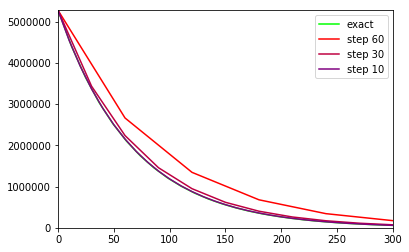

In [5]:
#RK2
exactX = np.linspace(0, 600)
plt.plot(exactX, exact(exactX, 5271000), color=[0,1,0])
xvals, yvals = dynamics_solve(population, s_0 = 5271000, h = 60, method="RK2")
xvals2, yvals2 = dynamics_solve(population, s_0 = 5271000, h = 30, method="RK2")
xvals3, yvals3 = dynamics_solve(population, s_0 = 5271000, h = 10, method="RK2")
xvals4, yvals4 = dynamics_solve(population, s_0 = 5271000, h = 1/12, method="RK2")


print("Mean Square Error of step size h = 60:", meanSquareError(xvals, yvals, exact))
print("Mean Square Error of step size h = 30:", meanSquareError(xvals2, yvals2, exact))
print("Mean Square Error of step size h = 10:", meanSquareError(xvals3, yvals3, exact))
print("Mean Square Error of step size h = 1/12:", meanSquareError(xvals4, yvals4, exact))



plt.plot(xvals, yvals, color = [1.,0.,0.])
plt.plot(xvals2, yvals2, color = [.75,0,.25])
plt.plot(xvals3, yvals3, color = [.5,0.,.5])

plt.axis([0, 300, 0, 5271000])
plt.legend(("exact", "step 60", "step 30", "step 10"))
plt.show()

For RK2, we found that using a step size of h = 10 leads to a graph that fits the exact solution graph extremely closely. Of course, even smaller step sizes create closer values to the exact solution. But, a step size of h = 10 was sufficiently small. The mean square error decreases rapidly as step size decreases.

Sufficiently small means that the results of the numerical solution are close enough to those of the exact solution that the graphs are hard to tell apart. In our case the step size of 10 is 10 years in this problem. If we lower that to 1/12 which is one month, the mean square error becomes extremely small (magnitude 1e-16).

Since RK2 has mean square error values much lower than Euler's method for the same step size, RK2 is more accurate than Euler's method in this case when using the same step size.

Mean Square Error of step size h = 60: 3.641733364323742e-07
Mean Square Error of step size h = 30: 1.3623208650126883e-09
Mean Square Error of step size h = 1/12: 2.0799044411374343e-30


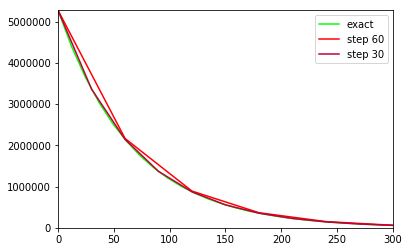

In [6]:
#RK4
exactX = np.linspace(0, 600)
plt.plot(exactX, exact(exactX, 5271000), color=[0,1,0])
xvals, yvals = dynamics_solve(population, s_0 = 5271000, h = 60, method="RK4")
xvals2, yvals2 = dynamics_solve(population, s_0 = 5271000, h = 30, method="RK4")
xvals3, yvals3 = dynamics_solve(population, s_0 = 5271000, h = 1/12, method="RK4")

print("Mean Square Error of step size h = 60:", meanSquareError(xvals, yvals, exact))
print("Mean Square Error of step size h = 30:", meanSquareError(xvals2, yvals2, exact))
print("Mean Square Error of step size h = 1/12:", meanSquareError(xvals3, yvals3, exact))


plt.plot(xvals, yvals, color = [1.,0.,0.])
plt.plot(xvals2, yvals2, color = [.75,0,.25])

plt.axis([0, 300, 0, 5271000])
plt.legend(("exact", "step 60", "step 30"))
plt.show()

For RK4, we found that using a step size of h = 30 leads to a graph that fits the exact solution graph extremely closely. Of course, even smaller step sizes create closer values to the exact solution. But, a step size of h = 30 was sufficiently small. The mean square error test decreased rapidly as the step size decreased.

Sufficiently small means that the results of the numerical solution are close enough to those of the exact solution that the graphs are hard to tell apart. In our case the step size of 30 is 30 years in this problem. If we lower that to 1/12 which is one month, the mean square error value becomes extremely small (magnitude 1e-30).

Since RK4 has mean square error values lower than Euler's method  and the RK2 method for the same step sizes, RK4 is more accurate than Euler's method and the RK2 method in this case when using the same step size.

## Solving the Hamiltonian for a Simple Harmonic Oscillator

In [7]:
#Partial derivative of the Hamiltonian with respect to coordinates
def dpH(q, p, m = 1.0):
    return p/m

#Partial derivative of the Hamiltonian with respect to momenta
def dqH(q, p, m = 1.0, w = 1.0):
    return m * (w**2) * q

#Returns an exact solution to the simple harmonic oscillator problem
#t is a numpy array
def exact(t, q_0 = 0.0, p_0 = 1.0, m = 1.0, w = 1.0):
    Q = (q_0 * np.cos(w * (t - t[0]))) + ((p_0 / (m * w)) * np.sin(w * (t - t[0])))
    P = (p_0 * np.cos(w * (t - t[0]))) - ((m * w * q_0) * np.sin(w * (t - t[0])))    
    return Q, P

### Euler's Method

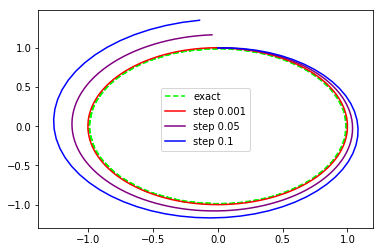

In [8]:
#Euler's method accuracy after 1 period based on step size
exactX = np.linspace(0, 600)
coords, momenta = exact(exactX)
plt.plot(coords, momenta, '--', color=[0,1,0])

tvals, xvals, yvals = hamiltonian_solve(dqH, dpH, N = int((2 * np.pi) / 0.001), h = 0.001)
plt.plot(xvals, yvals, color=[1,0,0])
tvals, xvals, yvals = hamiltonian_solve(dqH, dpH, N = int((2 * np.pi) / 0.05), h = 0.05)
plt.plot(xvals, yvals, color=[.5,0,.5])
tvals, xvals, yvals = hamiltonian_solve(dqH, dpH, N = int((2 * np.pi) / 0.1), h = 0.1)
plt.plot(xvals, yvals, color=[0,0,1])

plt.legend(("exact", "step 0.001", "step 0.05", "step 0.1"))

plt.show()

For Euler's method, it can be seen in the graph that as the step size of h increases, the graph deviates into a larger spiral away from the exact solution. We can tell that for a step size of 0.001, which is sufficiently small compared to the period of (2 * Pi), the numerical and exact solution plots align very closely.

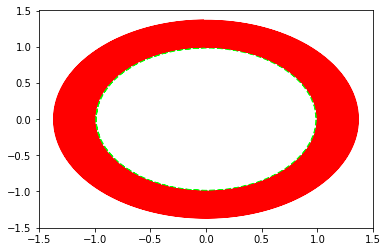

In [9]:
#Euler's method accuracy after a significant number of periods (100)
exactX = np.linspace(0, 600)
coords, momenta = exact(exactX)
plt.plot(coords, momenta, '--', color=[0,1,0])

tvals, xvals, yvals = hamiltonian_solve(dqH, dpH, N = 100 * int((2 * np.pi) / 0.001), h = 0.001)
plt.plot(xvals, yvals, color=[1,0,0])
plt.show()

For Euler's method, it can be seen here that even for the small step size of 0.001, after 100 periods, the numerical solution deviates a lot from the exact solution, creating a large band.

Since the numerical solution spirals outward as time goes on, it is clear that the energy of the system is not conserved and continues to increase. The maximum momentum and position for each period continue to increase as time goes on. This shows that the system energy increases.

### RK-2 Method

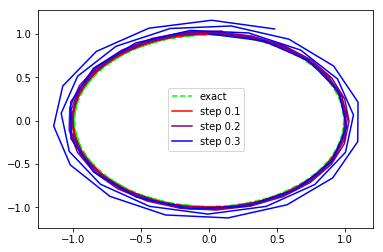

In [10]:
#RK-2 method accuracy after 1 period based on step size
exactX = np.linspace(0, 600)
coords, momenta = exact(exactX)
plt.plot(coords, momenta, '--', color=[0,1,0])

tvals, xvals, yvals = hamiltonian_solve(dqH, dpH, N = int((6 * np.pi) / 0.1), h = 0.1, method='RK2')
plt.plot(xvals, yvals, color=[1,0,0])
tvals, xvals, yvals = hamiltonian_solve(dqH, dpH, N = int((6 * np.pi) / 0.25), h = 0.25, method='RK2')
plt.plot(xvals, yvals, color=[.5,0,.5])
tvals, xvals, yvals = hamiltonian_solve(dqH, dpH, N = int((6 * np.pi) / 0.4), h = 0.4, method='RK2')
plt.plot(xvals, yvals, color=[0,0,1])

plt.legend(("exact", "step 0.1", "step 0.2", "step 0.3"))

plt.show()

For the RK-2 method, it can be seen in the graph that as the step size of h increases, the graph deviates into a larger spiral away from the exact solution. We can tell that for a step size of 0.1, which is sufficiently small compared to the period of $2\pi$, the numerical and exact solution plots align very closely.

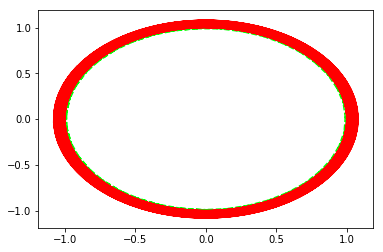

In [11]:
#RK-2 method accuracy after a significant number of periods (100)
exactX = np.linspace(0, 600)
coords, momenta = exact(exactX)
plt.plot(coords, momenta, '--', color=[0,1,0])

tvals, xvals, yvals = hamiltonian_solve(dqH, dpH, N = 100 * int((2 * np.pi) / 0.1), h = 0.1, method = 'RK2')
plt.plot(xvals, yvals, color=[1,0,0])
plt.show()

For the RK-2 method, it can be seen here that even for the small step size of 0.1, after 100 periods, the numerical solution deviates a lot from the exact solution, creating a large band. However, it does not deviate nearly as much as Euler's method does.

Since RK2 spirals outward like Euler's method, the energy is not conserved for the same reasons in Euler's method.

### RK-4 Method

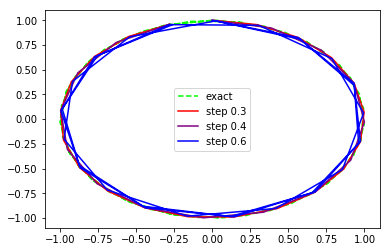

In [12]:
#RK-4 method accuracy after 1 period based on step size
exactX = np.linspace(0, 600)
coords, momenta = exact(exactX)
plt.plot(coords, momenta, '--', color=[0,1,0])

tvals, xvals, yvals = hamiltonian_solve(dqH, dpH, N = int((2 * np.pi) / 0.3), h = 0.3, method='RK4')
plt.plot(xvals, yvals, color=[1,0,0])
tvals, xvals, yvals = hamiltonian_solve(dqH, dpH, N = int((2 * np.pi) / 0.4), h = 0.4, method='RK4')
plt.plot(xvals, yvals, color=[.5,0,.5])
tvals, xvals, yvals = hamiltonian_solve(dqH, dpH, N = int((6 * np.pi) / 0.6), h = 0.6, method='RK4')
plt.plot(xvals, yvals, color=[0,0,1])

plt.legend(("exact", "step 0.3", "step 0.4", "step 0.6"))

plt.show()

For the RK-4 method, it can be seen in the graph that as the step size of h increases, the graph deviates into a smaller spiral away from the exact solution. We can tell that for a step size of 0.3, which is sufficiently small compared to the period of $2\pi$, the numerical and exact solution plots align very closely.

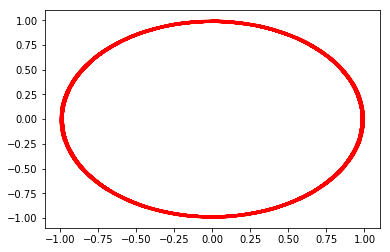

In [13]:
#RK-4 method accuracy after a significant number of periods (100)
exactX = np.linspace(0, 600)
coords, momenta = exact(exactX)
plt.plot(coords, momenta, '--', color=[0,1,0])

tvals, xvals, yvals = hamiltonian_solve(dqH, dpH, N = 100 * int((2 * np.pi) / 0.3), h = 0.3, method = 'RK4')
plt.plot(xvals, yvals, color=[1,0,0])
plt.show()

For the RK-4 method, it can be seen here that even for the small step size of 0.3, after 100 periods, the numerical solution deviates from the exact solution, creating a small band. It can clearly be seen that RK-4 deviates much less than RK-2 and Euler's method.

Since RK4 spirals outward like Euler's method, the energy is not conserved for the same reasons in Euler's and RK2 methods.

### SE Method

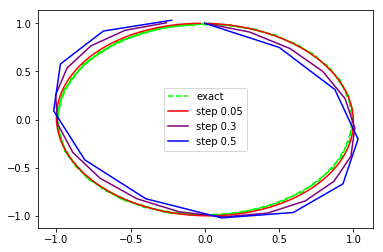

In [14]:
#SE method accuracy after 1 period based on step size
exactX = np.linspace(0, 600)
coords, momenta = exact(exactX)
plt.plot(coords, momenta, '--', color=[0,1,0])

tvals, xvals, yvals = hamiltonian_solve(dqH, dpH, N = int((2 * np.pi) / 0.05), h = 0.05, method='SE')
plt.plot(xvals, yvals, color=[1,0,0])
tvals, xvals, yvals = hamiltonian_solve(dqH, dpH, N = int((2 * np.pi) / 0.3), h = .3, method='SE')
plt.plot(xvals, yvals, color=[.5,0,.5])
tvals, xvals, yvals = hamiltonian_solve(dqH, dpH, N = int((2 * np.pi) / 0.5), h = 0.5, method='SE')
plt.plot(xvals, yvals, color=[0,0,1])

plt.legend(("exact", "step 0.05", "step 0.3", "step 0.5"))

plt.show()

For the Simplectic Euler's method, it can be seen in the graph that as the step size of h increases, the graph deviates into a more tilted ellipse from the exact solution. We can tell that for a step size of 0.05, which is sufficiently small compared to the period of (2 * Pi), the numerical and exact solution plots align very closely.

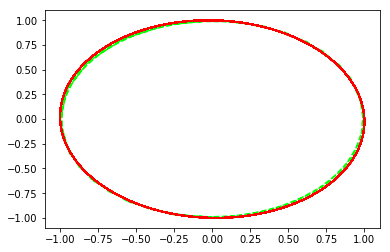

In [15]:
#SE method accuracy after a significant number of periods (100)
exactX = np.linspace(0, 600)
coords, momenta = exact(exactX)
plt.plot(coords, momenta, '--', color=[0,1,0])

tvals, xvals, yvals = hamiltonian_solve(dqH, dpH, N = 100 * int((2 * np.pi) / 0.05), h = 0.05, method = 'SE')
plt.plot(xvals, yvals, color=[1,0,0])
plt.show()

In the coordinate vs momenta plot for the SE method, even with a high value of periods, the numerical solution does not deviate any further from the numerical solution with a low number of periods. For this plot, the difference between the numerical solution and the exact solution does not depend on the number of periods but only on the step size. The tilted axis of the ellipse of the numerical solution will remain the same even if the number of periods changes.

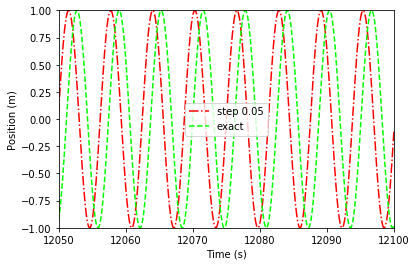

In [16]:
#SE method accuracy after a significant number of periods (2000) with respect to time
tvals, xvals, yvals = hamiltonian_solve(dqH, dpH, N = 2000 * int((2 * np.pi) / 0.05), h = 0.05, method = 'SE')
plt.plot(tvals, xvals, '-.', color=[1,0,0])

coords, momenta = exact(tvals)
plt.plot(tvals, coords, '--', color=[0,1,0])


plt.axis([12050, 12100, -1, 1])
plt.legend(("step 0.05", "exact"))
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.show()

However, if we look at the position vs time plot, the numerical solution deviates from the exact solution after a large number of periods even though the step size is very small.

For the SE method, the modified Hamiltonian is conserved, so the energy of the system follows that of the modified Hamiltonian. Therefore, the energy is conserved, just not along the exact Hamiltonian.

### SV Method

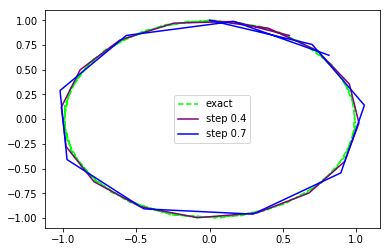

In [32]:
#SV method accuracy after 1 period based on step size
exactX = np.linspace(0, 600)
coords, momenta = exact(exactX)
plt.plot(coords, momenta, '--', color=[0,1,0])
tvals, xvals, yvals = hamiltonian_solve(dqH, dpH, N = 17, h = .4, method='SV')
plt.plot(xvals, yvals, color=[.5,0,.5])
tvals, xvals, yvals = hamiltonian_solve(dqH, dpH, N = 10, h = 0.7, method='SV')
plt.plot(xvals, yvals, color=[0,0,1])
plt.legend(("exact", "step 0.4", "step 0.7"))
plt.show()

For the Stormer Verlet method, we can tell that for a step size of 0.4, which is sufficiently small compared to the period of (2 * Pi), the numerical and exact solution plots align very closely. It can be seen in the graph that as the step size of h increases, the graph slightly deviates into a more tilted ellipse from the exact solution.

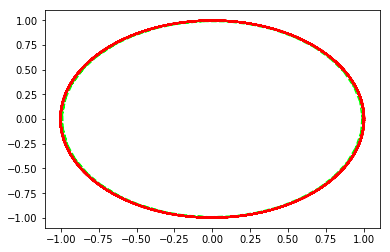

In [19]:
#SV method accuracy after a significant number of periods (100)
exactX = np.linspace(0, 600)
coords, momenta = exact(exactX)
plt.plot(coords, momenta, '--', color=[0,1,0])

tvals, xvals, yvals = hamiltonian_solve(dqH, dpH, N = 100 * int((2 * np.pi) / 0.2), h = 0.2, method = 'SV')
plt.plot(xvals, yvals, color=[1,0,0])
plt.show()

In the coordinate vs momenta plot for the SV method, even with a high value of periods, the numerical solution does not deviate any further from the numerical solution with a low number of periods. The difference between the numerical solution and the exact solution does not depend on the number of periods but only on the step size. The tilted axis of the ellipse of the numerical solution will remain the same even if the number of periods changes.

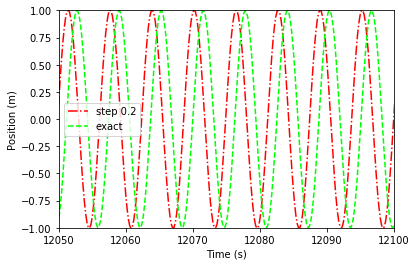

In [37]:
#SV method accuracy after a significant number of periods (2000) with respect to time
tvals, xvals, yvals = hamiltonian_solve(dqH, dpH, N = 2000 * int((2 * np.pi) / 0.2), h = 0.2, method = 'SV')
plt.plot(tvals, xvals, '-.', color=[1,0,0])

coords, momenta = exact(tvals)
plt.plot(tvals, coords, '--', color=[0,1,0])


plt.axis([12050, 12100, -1, 1])
plt.legend(("step 0.2", "exact"))
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.show()

However, if we look at the position vs time plot, the numerical solution deviates from the exact solution after a large number of periods even though the step size is very small.

Euler's method, RK-2 and RK-4 tend to deviate more significantly from the exact solution because they continue to spiral outward with increasing error as the number of periods increases. For the SV and SE methods, the error does not increase as the number of periods increases for the coordinate to momenta ratio. However, as time increases, the error does increase for these two methods. By looking at the graphs, it is obvious that the SV and SE methods align more closesly to the exact solution than the other methods.

### RK-4 vs SV Comparison

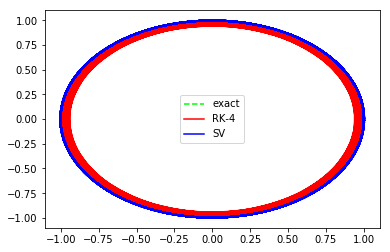

In [24]:
exactX = np.linspace(0, 600)
coords, momenta = exact(exactX)
plt.plot(coords, momenta, '--', color=[0,1,0])

tvals, xvals, yvals = hamiltonian_solve(dqH, dpH, N = 100 * int((2 * np.pi) / 0.4), h = 0.4, method = 'RK4')
plt.plot(xvals, yvals, color=[1,0,0])
tvals, xvals, yvals = hamiltonian_solve(dqH, dpH, N = 100 * int((2 * np.pi) / 0.2), h = 0.2, method = 'SV')
plt.plot(xvals, yvals, color=[0,0,1])
plt.legend(("exact", "RK-4", "SV"))

plt.show()

Here, it is clearly shown that RK-4 deviates in a spiral like manner inwards, whereas SV doesn't deviate from it's initial tilted ellipsoid path. For the SV method, the modified Hamiltonian is conserved, so the energy of the system follows that of the modified Hamiltonian. Therefore, the energy is conserved, just not along the exact Hamiltonian.

### Using the SV method to predict Kepler's Third Law

Kepler's Third law is:

\begin{equation} \label{eq:2}
\frac{a^3}{T^2} = \frac{G(M + m)}{4\pi^2}
\end{equation}

where a is the elliptical semi-major axis, T is the period, G is the gravitational constant, M is the mass of body 1, and m is the mass of body 2.

In [40]:
#Initial Conditions
m1 = 500000.0
m2 = 1000000.0
G = 6.67408e-11
K = G * m1 * m2
mu = (m1 * m2) / (m1 + m2)

#Hamiltonian Derivatives
def dpH(q, p):
    return p/mu


def dqH(q, p):
    #return np.array([((k * q[0]) / ((q[0]**2 + q[1]**2)**(3/2))), ((k * q[1]) / ((q[0]**2 + q[1]**2)**(3/2)))])
    return ((G * m1 * m2 * q) / (np.linalg.norm(q, ord=2)**3))

#Exact Solution
def exactSolution(theta, q_0, p_0, k=K):
    
    r_initial = (q_0[0]**2 + q_0[1]**2)**(.5)
    v_initial = (p_0[0]**2 + p_0[1]**2)** (0.5) / mu
    theta_dot_0 = (v_initial / r_initial)
    L = mu * (q_0[0]**2 + q_0[1]**2) * theta_dot_0
    #print(L)
    #r_0 = L**2 / (mu * k)
    
    #print(r_0)
    energy = (p_0[0]**2 + p_0[1]**2) / (2 * mu) - k / ((q_0[0]**2 + q_0[1]**2)**(.5))
    #print(energy)
    e = (1 + (2 * energy * L**2)/(mu * k**2))**(.5)
    r_0 = r_initial * (1 - e)
    #print(e)
    r = r_0 / (1 - e * np.cos(theta))
    return r


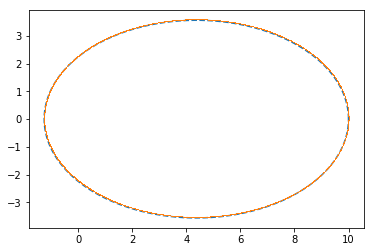

In [47]:
#Exact Test
test_theta = np.linspace(0, 2*np.pi, 5000)
test_q_0 = [10., 0]
test_p_0 = [0, 500]

exactR = exactSolution(test_theta, test_q_0, test_p_0)

exactX = exactR * np.cos(test_theta)
exactY = exactR * np.sin(test_theta)


#Numerical Test
tvals, coords, momenta = hamiltonian_solve(dqH, dpH, d = 2, q_0 = test_q_0, p_0 = test_p_0, h = 0.5, N = 16800, method = "SV")

plt.plot(coords[:, 0], coords[:, 1],'--')
plt.plot(exactX, exactY, ',')
plt.show()

It can be seen from the plot above that the numerical solution aligns very closely with the exact solution. The step size of 0.5 was chosen so that it is much smaller than the period of 8400.

In [52]:
#Kepler 3rd law
#the semi-major axis is 10 in our test case
extremes = np.amin(coords, axis = 0)
semiMajor = abs(extremes[0] - coords[0, 0]) / 2
extremesInd = np.argmin(coords, axis=0)
period = 2 * abs(tvals[0] - tvals[extremesInd[0]])
p2 = period**2
r3 = ((4*(np.pi**2))/(G * (m1 + m2))) * (semiMajor**3)
print("T (period):", p2, "s")
print("((4*pi)/(G*M))*r^3:", r3, "s")

print("Percent error:", ((p2 - r3)/p2) * 100, "%")

T (period): 70492816.0 s
((4*pi)/(G*M))*r^3: 70485312.56806967 s
Percent error: 0.010644250515305527 %


Using the equation for Kepler's third law above, it is shown that T^2 is directly proporiotnal to r^3, so therefore Kepler's 3rd law is conserved. The percent error is 0.01%.

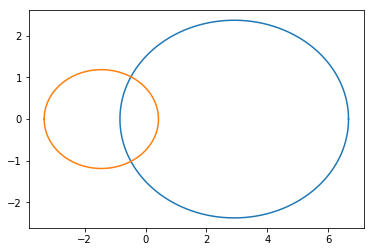

In [51]:
r1 = (m2 / (m1 + m2)) * coords
r2 = -(m1 / (m1 + m2)) * coords

a = plt.plot(r1[:,0], r1[:,1])
b = plt.plot(r2[:,0], r2[:,1])
plt.show()

These are the paths of orbit for each mass individually used in our tests above.